In [36]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *

data = {
    'x1': load_data('../stats/fpm_4_2D_x1.json'),
    'x4': load_data('../stats/fpm_4_2D_x2.json'),
    'x16': load_data('../stats/fpm_4_2D_x4.json'),
    'x64': load_data('../stats/fpm_4_2D_x8.json'),
}

In [37]:
shape = [4, 1]
figsize = (7, 6)

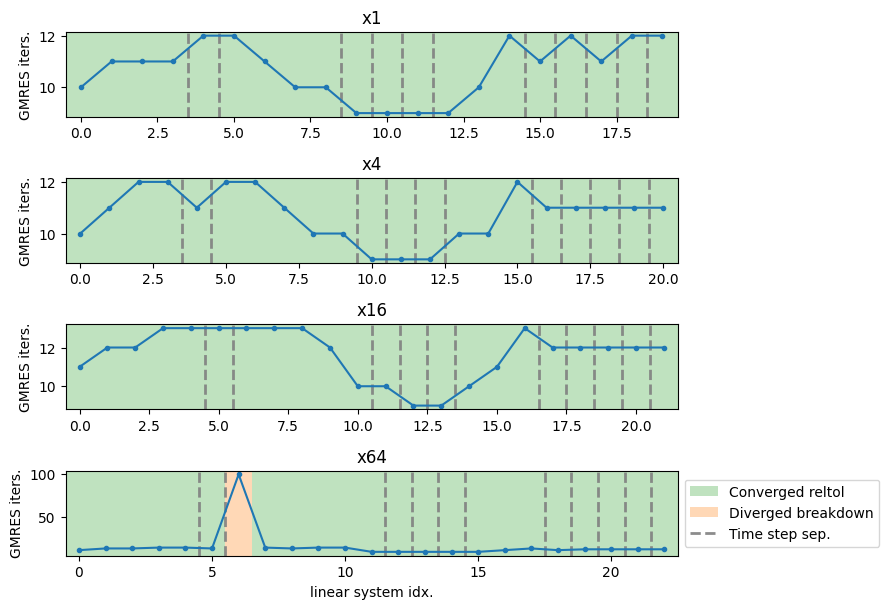

In [38]:
def render_element(entry: Sequence[TimeStepStats]):
    color_converged_reason(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    plt.plot(get_gmres_iterations(entry), marker='.')

plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True)

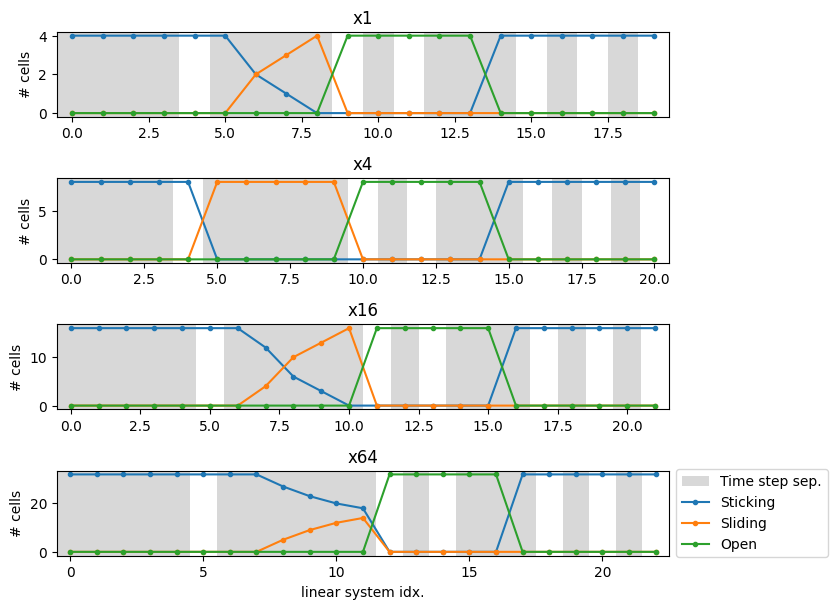

In [39]:
def render_element(entry: Sequence[TimeStepStats]):
    sticking, sliding, open_ = get_num_sticking_sliding_open(entry)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.plot(sticking, label='Sticking', marker='.')
    plt.plot(sliding, label='Sliding', marker='.')
    plt.plot(open_, label='Open', marker='.')

plot_grid(data, render_element, shape=shape, figsize=figsize, ylabel='# cells')

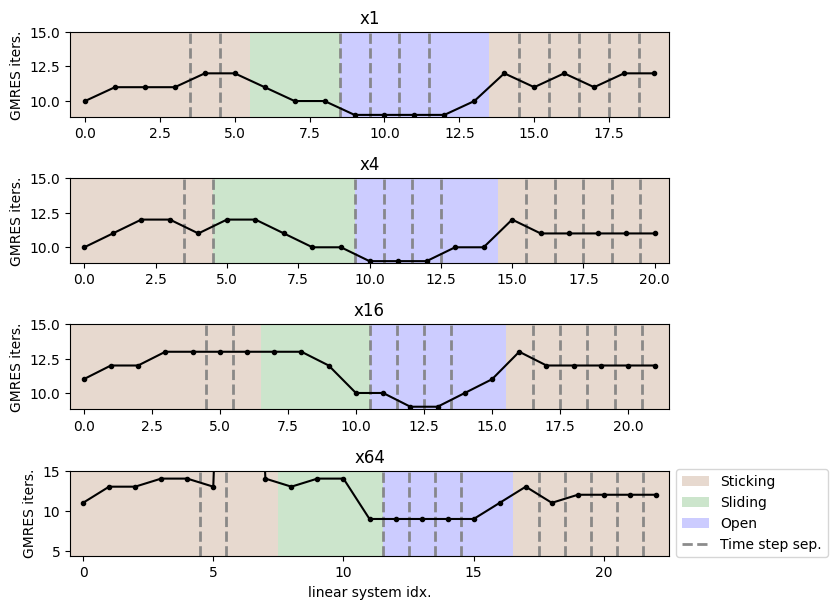

In [40]:
def render_element(entry: Sequence[TimeStepStats]):
    color_sticking_sliding_open(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    plt.plot(get_gmres_iterations(entry), marker='.', color='black')
    plt.ylim(top=15)

plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


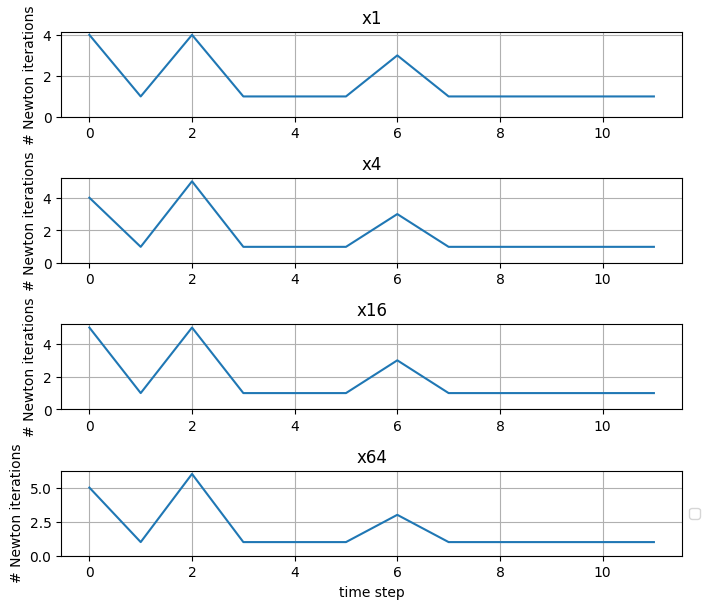

In [41]:
def render_element(entry: Sequence[TimeStepStats]):
    plt.plot(get_newton_iterations(entry))
    plt.ylim(bottom=0)
    plt.grid()

plot_grid(data, render_element, shape=shape, figsize=figsize, ylabel='# Newton iterations', xlabel='time step')

Text(0.5, 0, 'Simulation time, s')

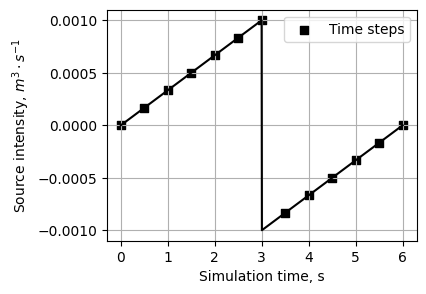

In [42]:
from fpm_4_2D import make_model

model = make_model()
model.prepare_simulation()
source = []
t_list = np.linspace(0, 6, 13, endpoint=True)
for t in t_list:
    source.append(model.get_source_intensity(t))

source_fine = []
t_list_fine = np.linspace(0, 6, 1000, endpoint=True)
for t in t_list_fine:
    source_fine.append(model.get_source_intensity(t))

plt.figure(figsize=(4, 3))
plt.plot(t_list_fine, source_fine, color='black')
plt.scatter(t_list, source, marker='s', label='Time steps', color='black')
plt.grid()
plt.legend()
plt.ylabel(r'Source intensity, $m^3 \cdot s^{-1}$')
plt.xlabel('Simulation time, s')